# Lasso Regression 

##BY: RHEA SETHI 

# 1.) Import the data into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
#Importing the data
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Converting "sex" column into a binary variable
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0

#Converting "smoker" column into a binary variable
df.loc[df["smoker"] == "yes","smoker"] = 1
df.loc[df["smoker"] == "no","smoker"] = 0
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [ ]:
#Using LabelEncoder to encode "region" column

df1 = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["region"] = le.fit_transform(df["region"])
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
#Slicing the data to get dependent and independent variables
data = np.array(df1.iloc[:,:-1]) 
target = np.array(df1.iloc[:,-1])

In [ ]:
cut = int((len(data) * .8) //1)

In [ ]:
#Splitting the data into in-sample and out-of-sample
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing 

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
#Pulling out value of lambda 
l = modCV.alpha_
l

133.34880015958146

# 5.) Run a lambda regression with that Lambda

In [ ]:
#Fitting a model using the above lambda
from sklearn.linear_model import Lasso

model = Lasso(alpha = l).fit(in_data_scale, in_target)

# 6.) Visualize the coefficients 

In [ ]:
#Pulling out the model coefficients
coeffs = model.coef_
coeffs

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

In [ ]:
#Creating a dataframe of predictor names and respective coefficients
df2 = pd.DataFrame(zip(df1.columns[:-1], model.coef_))

Text(0.5, 1.0, 'Coefficients of Lasso Regression')

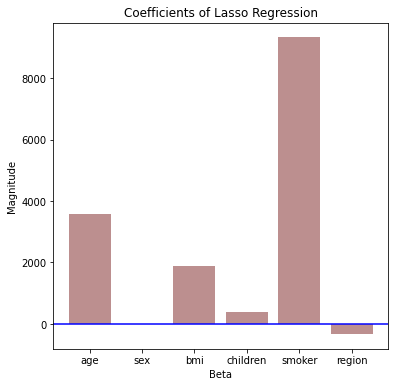

In [ ]:
#Visualisation
plt.figure(figsize = (6,6))
plt.bar(df2[0],df2[1], color = "rosybrown")
plt.axhline(0, color = "blue")
plt.xlabel("Beta")
plt.ylabel("Magnitude")
plt.title("Coefficients of Lasso Regression")

# 7.) Interpret the coefficients

The Lasso Regression performs **feature selection** by penalizing variables that do not contribute much to the model and shrinking their coefficients to zero. As such, the higher the magnitude of a coefficient, the more important the predictor is in estimating the dependent variable.

From the Lasso regression model above, we see that the coefficient on the predictor "**smoker**" is the highest in magnitude, indicating that, based on our data, whether or not a person is a smoker is arguably the **most important** feature in predicting their insurance charges (the y-variable). This is followed by a person's age and their Body-Mass Index. The number of children and region have relatively very low magnitudes of coefficients, indicating they have less of an impact on an individual's insurance charges.
We also see that the coefficient on "**sex**" is 0. The Lasso regression model suggests that this variable is **unimportant** and should be dropped from the model.

Another insight we can draw is the **direction** of the relationship of a predictor with the dependent variable. "Age", "BMI", "children" and "smoker" are all positively correlated with insurance charges, meaning an increase in any of these variables leads to an increase in charges. "Region", however, has a negative correlation with insurance charges, suggesting that as we move from north to south (encoded between 0 and 4), individuals pay less insurance charges.



# 8.) Compare in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#In-sample MSE
pred_train = model.predict(in_data_scale)
mse_train = mean_squared_error(in_target, pred_train)
print("In sample MSE: {}".format(mse_train))

In sample MSE: 36490415.101693384


In [ ]:
#Out-of-Sample MSE
pred_test = model.predict(out_data_scale)
mse_test = mean_squared_error(out_target, pred_test)
mse_test
print("Out of sample MSE: {}".format(mse_test))

Out of sample MSE: 37252730.724018715


The in-sample MSE gives us a baseline to compare our out-of-sample MSE with. We see that the latter is larger in magnitude. This is expected since training errors are usually smaller than testing errors. 